<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Pietruszkiewicz/uczenie_nienadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer

In [52]:
df = pd.read_csv("countries of the world.csv")

In [53]:
df.shape

(227, 20)

In [54]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [55]:
# Zamień 0 na NaN
df_numeric.replace(0, np.nan, inplace=True)
# Utwórz obiekt imputera, który zastąpi NaN średnią wartością
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Zastosuj imputer do danych
df_imputed = imputer.fit_transform(df_numeric)

# Normalizuj dane
df_normalized = scaler.fit_transform(df_imputed)
scaler = StandardScaler()

In [56]:
# usuwanie kolumn, które nie są numeryczne
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [57]:
# Metoda Kmeans do analizy skupień
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
# Dodaj etykiety klastrów do oryginalnej ramki danych
df['cluster'] = kmeans.labels_

In [59]:
# Sprawdź sugerowaną liczbę k za pomocą metody silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_normalized)
    score = silhouette_score(df_normalized, kmeans.labels_)
    silhouette_scores.append(score)

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Suggested number of clusters: {best_k}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Suggested number of clusters: 2


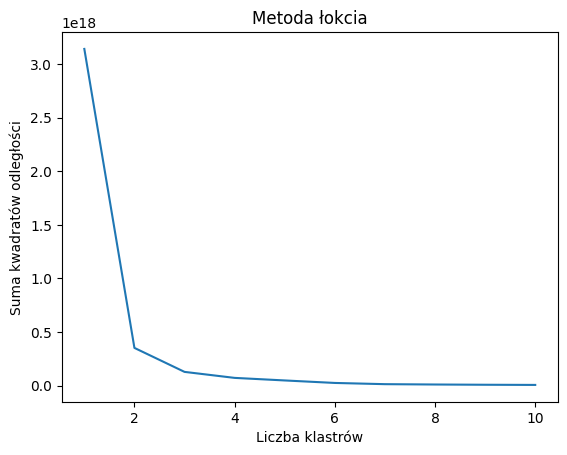

In [60]:
# Obliczanie sumy kwadratów odległości dla różnych liczby klastrów
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_imputed)
    wcss.append(kmeans.inertia_)

# Wykreślanie wyników
plt.plot(range(1, 11), wcss)
plt.title('Metoda łokcia')
plt.xlabel('Liczba klastrów')
plt.ylabel('Suma kwadratów odległości')
plt.show()

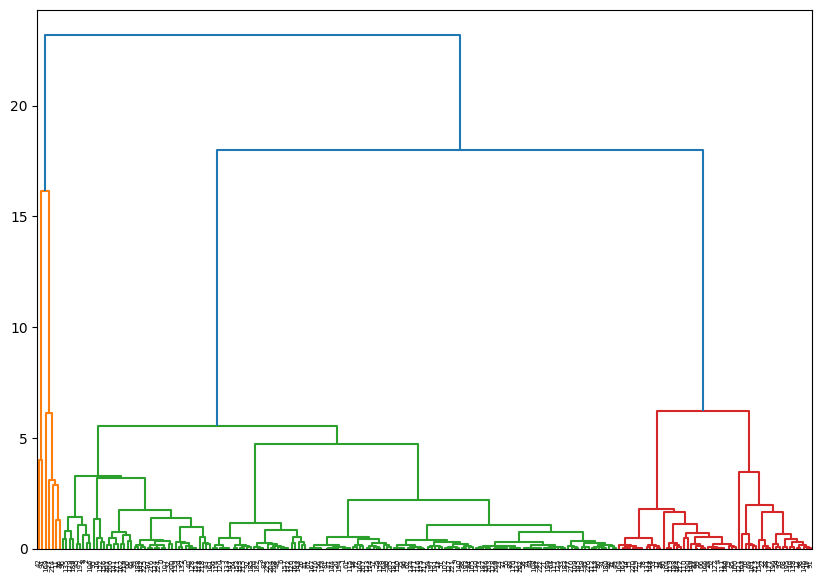

In [61]:
# Zbuduj dendrogram
linked = linkage(df_normalized, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()